In [1]:
import os

os.environ["JAX_PLATFORMS"] = "cpu"
os.environ["JAX_ENABLE_X64"] = "True"


In [2]:
from bpd.io import load_dataset, save_dataset
import matplotlib.pyplot as plt 
import numpy as np 



# Compare means and errors across groups

In [14]:
fpath1= "/pscratch/sd/i/imendoza/data/cache_chains/exp70_51/g_samples_512_plus.npz"
fpath2= "/pscratch/sd/i/imendoza/data/cache_chains/exp71_51/shear_samples_512_plus.npz"
fpath3= "/pscratch/sd/i/imendoza/data/cache_chains/exp72_51/g_samples_512_plus.npz"
fpath4= "/pscratch/sd/i/imendoza/data/cache_chains/exp73_51/shear_samples_512_plus.npz"

fpaths = [fpath1, fpath2, fpath3, fpath4]

In [15]:
efpath1= "/pscratch/sd/i/imendoza/data/cache_chains/exp70_51/g_samples_514_errs.npz"
efpath2= "/pscratch/sd/i/imendoza/data/cache_chains/exp71_51/g_samples_514_errs.npz"
efpath3= "/pscratch/sd/i/imendoza/data/cache_chains/exp72_51/g_samples_514_errs.npz"
efpath4= "/pscratch/sd/i/imendoza/data/cache_chains/exp73_51/g_samples_514_errs.npz"

errs_fpaths = [efpath1, efpath2, efpath3, efpath4]

In [16]:
mu1 = []
sigma1 = [] 
for fpath in fpaths:
    ds = load_dataset(fpath)
    g1 = ds['samples']['g1']
    assert g1.ndim == 1
    mu1.append(g1.mean())
    sigma1.append(g1.std())

In [17]:
# # plt.hist(g1)
# plt.hist(g1s[10, :])
# plt.hist(g1)

In [18]:
mu2 = []
sigma2 = [] 
for fp in errs_fpaths:
    ds = load_dataset(fp)
    g1s = ds['plus']['g1']
    mu2.append(g1s.mean())
    sigma2.append(g1s.std(axis=1).mean() / np.sqrt(len(g1s)))

In [19]:
# remember wrong for case 4 
mu3 = []
for fp in errs_fpaths:
    ds = load_dataset(fp)
    g1 = ds['plus']['g1']
    Sigma = np.sum((g1.var(axis=1))**-1)**-1
    fmu = Sigma * np.sum(g1.var(axis=1)**-1 * g1.mean(axis=1))
    mu3.append(fmu)

In [20]:
# # # remember wrong for case 4 
# mu4 = []
# for fp in errs_fpaths:
#     ds = load_dataset(fp)
#     g1 = ds['plus']['g1'] 
#     g2 = ds['plus']['g2']
#     gs = np.stack([g1,g2], axis=-1)
#     mu = gps.mean(1)
#     covs = [] 
#     for ii in range(len(gs)):
#         covs.append(np.cov(gs[ii].T))
#     covs = np.stack(covs)
    
#     fcov = 0. 
#     for ii in range(len(covs)):
#         fcov += np.linalg.inv(covs[ii])
#     fcov = np.linalg.inv(fcov)
    
#     fmu = 0.
#     for ii in range(len(covs)):
#         fmu += np.linalg.inv(covs[ii]).dot(mu[ii].T)
    
#     fmu = fcov.dot(fmu)
#     mu4.append(fmu[0])

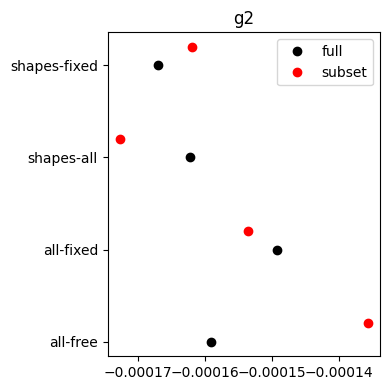

In [21]:

fig, ax = plt.subplots(1,1, figsize=(4,4))
ys = np.array([0.75, 0.5, 0.25, 0.0])

# multiplicative bias
ax.errorbar(x=mu1, y=ys, color="k", fmt="o", capsize=10.0, label='full')
ax.errorbar(x=mu2,  y=ys+0.05, color="r", fmt="o", capsize=10.0, label='subset')
# ax.errorbar(x=mu3, y=ys+0.1, color="b", fmt="o", capsize=10.0)
# ax.errorbar(x=mu4, y=ys-0.05, color="m", fmt="o", capsize=10.0)


ax.set_yticks([0.75, 0.5, 0.25, 0.0])
ax.set_yticklabels(["shapes-fixed", "shapes-all", "all-fixed", "all-free"])
plt.title("g2")
# ax.set_ylim(-0.1, 0.85)



# ax.set_xlim(-3, 3)
plt.legend()
plt.tight_layout()

In [41]:
mu1

[np.float64(0.020581086706269302),
 np.float64(0.020581601642302313),
 np.float64(0.020550694288506016),
 np.float64(0.020540975134959158)]